In [4]:
import itertools
from aoc2024.grid_path_search import Grid, Wall

In [5]:
with open('../../data/day18-input.txt') as f:
    falling_bytes = []
    for line in f.readlines():
        parts = line.strip().split(',')
        x, y = parts
        falling_bytes.append((int(x), int(y)))


In [6]:

byte_index = {}
for b in falling_bytes[:1024]:
    byte_index[b] = b

grid_size = (71, 71)
grid_data = []
for y in range(grid_size[1]):
    row = []
    for x in range(grid_size[0]):
        if (x, y) in byte_index:
            row.append(1)
        else:
            row.append(0)
    grid_data.append(row)

grid = Grid()
grid.load_input(grid_data)
grid.start = grid.index[(0,0)]
grid.end = grid.index[(grid_size[0]-1, grid_size[1]-1)]
winning_actors, iteration = grid.start_walking()

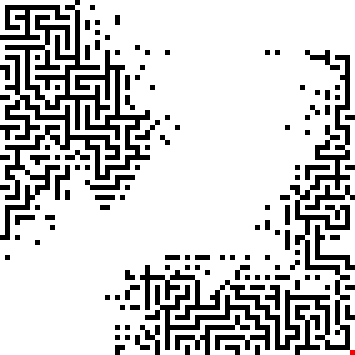

In [7]:
grid.visualize(winning_actors)

In [8]:
winning_actors = sorted(winning_actors, key=lambda a: len(a.previous))
print(len(winning_actors[0].previous) - 1)

308


### Part 2
Now, we just need to find which falling byte will block the route to the end position.
Iterate over the remaining blocks and run the pathfinder until there are no winning actors returned.


In [10]:
grid_size = (71, 71)
byte_index = {}
for b in falling_bytes[:1024]:
    byte_index[b] = b

for i in range(len(falling_bytes[1024:])):
    falling_byte = falling_bytes[1024 + i]
    byte_index[falling_byte] = falling_byte
    print("checking", falling_byte)
    grid_data = []
    for y in range(grid_size[1]):
        row = []
        for x in range(grid_size[0]):
            if (x, y) in byte_index:
                row.append(1)
            else:
                row.append(0)
        grid_data.append(row)
    grid = Grid()
    grid.load_input(grid_data)
    grid.start = grid.index[(0,0)]
    grid.end = grid.index[(grid_size[0]-1, grid_size[1]-1)]

    print("Grid has %s walls" % len([x for x in itertools.chain(*grid.data) if isinstance(x, Wall)]))

    winning_actors, iteration = grid.start_walking()
    if not winning_actors:
        print("no winning actors at", falling_byte)
        break


checking (33, 4)
Grid has 1025 walls
checking (29, 25)
Grid has 1026 walls
checking (42, 23)
Grid has 1027 walls
checking (55, 49)
Grid has 1028 walls
checking (47, 30)
Grid has 1029 walls
checking (25, 60)
Grid has 1030 walls
checking (35, 52)
Grid has 1031 walls
checking (37, 35)
Grid has 1032 walls
checking (19, 54)
Grid has 1033 walls
checking (64, 55)
Grid has 1034 walls
checking (54, 3)
Grid has 1035 walls
checking (43, 29)
Grid has 1036 walls
checking (30, 33)
Grid has 1037 walls
checking (55, 23)
Grid has 1038 walls
checking (41, 3)
Grid has 1039 walls
checking (6, 57)
Grid has 1040 walls
checking (2, 47)
Grid has 1041 walls
checking (53, 53)
Grid has 1042 walls
checking (47, 51)
Grid has 1043 walls
checking (7, 49)
Grid has 1044 walls
checking (10, 69)
Grid has 1045 walls
checking (31, 47)
Grid has 1046 walls
checking (6, 49)
Grid has 1047 walls
checking (29, 47)
Grid has 1048 walls
checking (51, 3)
Grid has 1049 walls
checking (55, 26)
Grid has 1050 walls
checking (32, 47)
Gr

The above took 52m 46s to run. I could have used that other code to parallelize the search. I calculated a worst case of 8 hours.